## Prepare Data

In [148]:
# Import our dependencies
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [149]:
#read the csv
ML_Data= pd.read_csv('Data/Five_Year_Data.csv')
ML_Data.head()

,GEO_ID,Below_9th_grade,9_12th_grade,High_School_Grad,Some_College,Associate's_degree,Bachelor's_degree,Graduate_degree,Population (16+),Employed,...,Total Population,White,Black,American Indian,Asian,Pacific Islander,Hispanic/Latino,County,State,Year
0,0500000US01001,2.6,8.7,32.6,20.3,8.1,15.9,11.8,43368.0,24124.0,...,55200,76.9,19.1,0.3,1.0,0.1,2.8,Autauga County,Alabama,2018
1,0500000US01003,2.7,7.0,27.6,22.0,9.4,20.7,10.6,167712.0,93379.0,...,208107,86.3,9.5,0.7,0.8,0.0,4.5,Baldwin County,Alabama,2018
2,0500000US01005,8.2,18.8,35.7,18.1,7.0,7.8,4.4,20948.0,8720.0,...,25782,47.4,47.6,0.3,0.4,0.0,4.3,Barbour County,Alabama,2018
3,0500000US01007,5.7,11.1,47.3,18.6,5.8,7.6,3.9,18470.0,8099.0,...,22527,76.7,22.3,0.0,0.2,0.0,2.4,Bibb County,Alabama,2018
4,0500000US01009,7.5,12.4,34.0,21.4,12.0,8.1,4.5,45915.0,21346.0,...,57645,95.5,1.5,0.2,0.3,0.0,9.1,Blount County,Alabama,2018


In [150]:
ML_Data.columns

Index(['GEO_ID', 'Below_9th_grade', '9_12th_grade', 'High_School_Grad',
       'Some_College', 'Associate's_degree', 'Bachelor's_degree',
       'Graduate_degree', 'Population (16+)', 'Employed',
       'Median Household Income', 'Per capita Income', 'Unemployment Rate',
       'Professional (Occupation)', 'Service (Occupation)',
       'Sales (Occupation)', 'Construction (Occupation)',
       'Production (Occupation)', 'Salary (Class)', 'Gov't (Class)',
       'Self-employed (Class)', 'Fam-unpaid (Class)', 'Poverty',
       'Child-poverty', 'Median Home value', 'Median Mortgage', 'Median Rent',
       'Total Population', 'White', 'Black', 'American Indian', 'Asian',
       'Pacific Islander', 'Hispanic/Latino', 'County', 'State', 'Year'],
      dtype='object')

In [151]:
## Data that has been tested
# All data excluding State, County, Year, Geo_ID: R2 Score: 0.930
# education level data to poverty rate:  R2 Score: 0.568
# Occupation Data to Poverty rate: R2 Score: 0.294
# Occupation and class data to poverty rate: R2 Score: 0.501
# Income and property data to poverty rate: R2 Score: 0.749 highly correlated data
# Demographic Data to poverty rate: R2 Score: 0.575
# education, Occupation, and Demographic to poverty rate: R2 Score: 0.751 high MSE of 9

# note: Economic data such as Income and Home values was more important out of all features

## Highly Correlated data to avoid redundancy removed: 
# Child -Poverty,Median Mortgage, Median Rent, Per Capita Income
# Employed/Popultion 16+/ Total Population (Chose one)


#Model Data to test
# 'Median Household Income', 'Per capita Income','Median Home value', 'Median Mortgage', 'Median Rent'
Poverty_data= ML_Data[['Below_9th_grade', '9_12th_grade', 'High_School_Grad',
       'Some_College', "Associate's_degree", "Bachelor's_degree",
       'Graduate_degree', 'Population (16+)',
       'Median Household Income', 'Unemployment Rate',
       'Professional (Occupation)', 'Service (Occupation)',
       'Sales (Occupation)', 'Construction (Occupation)',
       'Production (Occupation)', 'Salary (Class)', "Gov't (Class)",
       'Self-employed (Class)', 'Fam-unpaid (Class)', 'Poverty',
       'Median Home value',
       'White', 'Black', 'American Indian', 'Asian',
       'Pacific Islander', 'Hispanic/Latino','State']]
Poverty_data.head()

,Below_9th_grade,9_12th_grade,High_School_Grad,Some_College,Associate's_degree,Bachelor's_degree,Graduate_degree,Population (16+),Median Household Income,Unemployment Rate,...,Production (Occupation),Poverty,Median Home value,White,Black,American Indian,Asian,Pacific Islander,Hispanic/Latino,State
0,2.6,8.7,32.6,20.3,8.1,15.9,11.8,43368.0,58786.0,4.2,...,15.0,15.4,147900.0,76.9,19.1,0.3,1.0,0.1,2.8,Alabama
1,2.7,7.0,27.6,22.0,9.4,20.7,10.6,167712.0,55962.0,4.4,...,11.7,10.6,189800.0,86.3,9.5,0.7,0.8,0.0,4.5,Alabama
2,8.2,18.8,35.7,18.1,7.0,7.8,4.4,20948.0,34186.0,9.5,...,26.5,28.9,92900.0,47.4,47.6,0.3,0.4,0.0,4.3,Alabama
3,5.7,11.1,47.3,18.6,5.8,7.6,3.9,18470.0,45340.0,7.5,...,23.0,14.0,96500.0,76.7,22.3,0.0,0.2,0.0,2.4,Alabama
4,7.5,12.4,34.0,21.4,12.0,8.1,4.5,45915.0,48695.0,4.1,...,19.9,14.4,124700.0,95.5,1.5,0.2,0.3,0.0,9.1,Alabama


## Data Exploration and Analysis

In [152]:
# Calculate the correlation matrix
#https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
#chatgpt for aid on plotting
# correlation = Poverty_data.corr()

# # Plotting the heatmap
# plt.figure(figsize=(12, 8))
# sb.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show()


# One Hot Encoder - Only run if there is categorical data

In [153]:
Poverty_data.dtypes

Below_9th_grade              float64
9_12th_grade                 float64
High_School_Grad             float64
Some_College                 float64
Associate's_degree           float64
Bachelor's_degree            float64
Graduate_degree              float64
Population (16+)             float64
Median Household Income      float64
Unemployment Rate            float64
Professional (Occupation)    float64
Service (Occupation)         float64
Sales (Occupation)           float64
Construction (Occupation)    float64
Production (Occupation)      float64
Poverty                      float64
Median Home value            float64
White                        float64
Black                        float64
American Indian              float64
Asian                        float64
Pacific Islander             float64
Hispanic/Latino              float64
State                         object
dtype: object

In [154]:
# Generate our categorical variable lists. #checks for all cetegories that are objects
state_cat = Poverty_data.dtypes[Poverty_data.dtypes == "object"].index.tolist()

In [155]:
# Check the number of unique values in each column
Poverty_data[state_cat].nunique()

State    51
dtype: int64

In [156]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse_output=False)
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(Poverty_data[state_cat]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(state_cat)
encode_df.head()

,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
# Merge one-hot encoded features and drop the originals
Poverty_data=Poverty_data.merge(encode_df,left_index=True, right_index=True)
Poverty_data= Poverty_data.drop(state_cat, axis=1)
Poverty_data.head()

,Below_9th_grade,9_12th_grade,High_School_Grad,Some_College,Associate's_degree,Bachelor's_degree,Graduate_degree,Population (16+),Median Household Income,Unemployment Rate,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,2.6,8.7,32.6,20.3,8.1,15.9,11.8,43368.0,58786.0,4.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.7,7.0,27.6,22.0,9.4,20.7,10.6,167712.0,55962.0,4.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.2,18.8,35.7,18.1,7.0,7.8,4.4,20948.0,34186.0,9.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.7,11.1,47.3,18.6,5.8,7.6,3.9,18470.0,45340.0,7.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.5,12.4,34.0,21.4,12.0,8.1,4.5,45915.0,48695.0,4.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Random Forest Model

In [158]:
# Split target column and Features Columns
y = Poverty_data['Poverty']
X = Poverty_data.drop(columns='Poverty')

In [159]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [160]:
# Create scaler instance
scaler = StandardScaler()
# Fit the Standardscaler with training data
scaler.fit(X_train)
# Scale the training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

* Fitting the Random Forest Model

In [161]:
# Create the random forest Regressor instance
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)

In [162]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

- Making Predictions Using the Random Forest Model

In [163]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

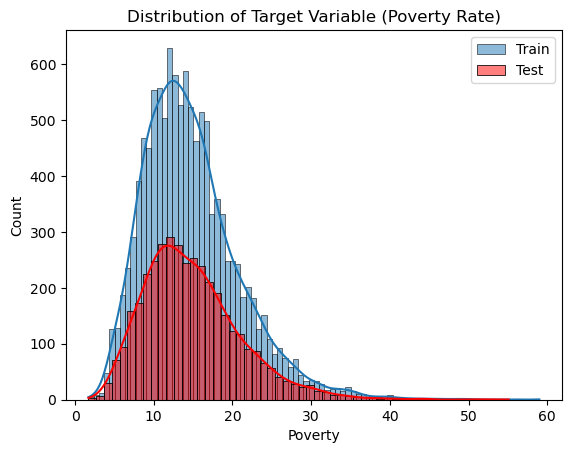

In [164]:
# Visualize the distribution of the target variable
sb.histplot(y_train, kde=True, label='Train')
sb.histplot(y_test, kde=True, label='Test', color='red')
plt.legend()
plt.title('Distribution of Target Variable (Poverty Rate)')
plt.show()


In [165]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.6670929231033476, 'Median Household Income'),
 (0.07593433043718988, 'White'),
 (0.02828801008143272, 'American Indian'),
 (0.02511988240594519, 'Unemployment Rate'),
 (0.021886739361210793, 'Population (16+)'),
 (0.013237851767644488, "Bachelor's_degree"),
 (0.012682670542014574, 'Hispanic/Latino'),
 (0.011820903640335721, 'Professional (Occupation)'),
 (0.011452695831792049, 'Service (Occupation)'),
 (0.011288454094071504, 'Median Home value'),
 (0.010853119103353664, 'Construction (Occupation)'),
 (0.010531565148594286, '9_12th_grade'),
 (0.009613414707627705, 'Production (Occupation)'),
 (0.009509607754970995, 'Graduate_degree'),
 (0.009098747986808386, 'Sales (Occupation)'),
 (0.008984399118507756, 'Black'),
 (0.008827425046935473, 'High_School_Grad'),
 (0.008501979406327001, 'Below_9th_grade'),
 (0.007971863744518715, 'State_South Dakota'),
 (0.007710913933223981, 'Asian'),
 (0.0074767747560291605, 'Some_College'),
 (0.0072925446925387015, "Associate's_degree"),
 (0.002759358

In [166]:
# Import relevant metrics from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

# Compute metrics for the linear regression model: score, r2, mse, rmse, std
score = rf_model.score(X, y, sample_weight=None)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")


/Users/gcarmona/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


The score is -0.4343356664876723.
The r2 is 0.8452651671963882.
The mean squared error is 6.002304470945325.
The root mean squared error is 2.4499600957863223.
The standard deviation is 6.220438667941329.
